In [55]:
from numpy import genfromtxt
from numpy import arange
from scipy.stats import expon, norm, lognorm, weibull_min, probplot, pearsonr, kstest
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import log10, log, ceil
%matplotlib inline

In [2]:
data = genfromtxt('Dados-medicos.csv',skip_header=True,delimiter=' ')

In [53]:
Color = ["Blue","Green", "Red", "Purple"]
dados = pd.DataFrame(data, columns=['Idade', 'Peso','Carga Final','VO2 medido máximo'])

In [4]:
dados.describe()

,Idade,Peso,Carga Final,VO2 medido máximo
count,1172.000000,1172.000000,1172.000000,1172.000000
mean,53.290956,85.925776,172.271502,29.394728
std,14.746297,14.799113,70.093124,10.497250
min,18.000000,45.300000,30.000000,5.846847
25%,42.000000,76.100000,120.000000,21.797423
50%,54.000000,83.700000,170.000000,28.326660
75%,64.000000,94.450000,220.000000,35.853793
max,91.000000,178.900000,432.000000,73.333333


In [43]:
dados.var()

Idade                 217.453274
Peso                  219.013757
Carga Final          4913.045985
VO2 medido máximo     110.192255
dtype: float64

In [60]:
bin7= 1 + ceil(log(count,2))
print(bin7,bin)

12 12


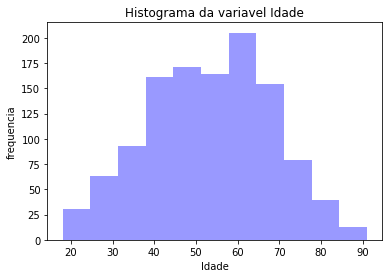

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


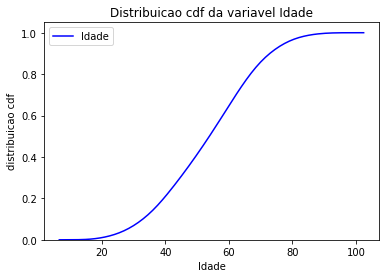

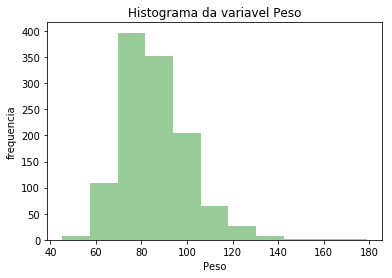

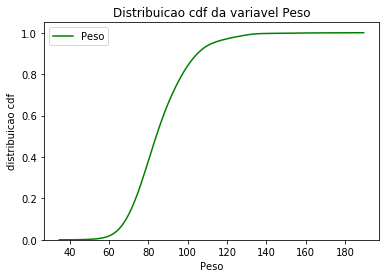

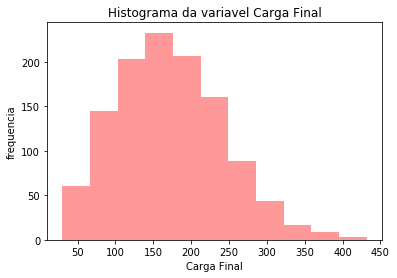

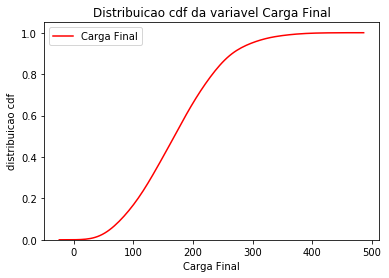

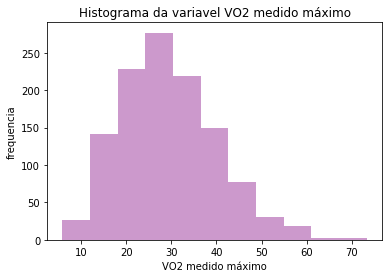

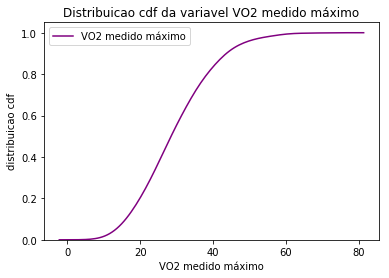

In [68]:
for i in range (0,4):
    x = dados.columns[i]
    count = dados[x].count()
    bin= 1+ 3.3* log10(count)
    
    sns.distplot(dados[x],int(bin),color=Color[i], rug=False,kde=False)
    plt.title('Histograma da variavel '+x)
    plt.xlabel(x)
    plt.ylabel('frequencia')
    plt.savefig('Histograma da variavel '+x)
    plt.show()
    
    sns.kdeplot(dados[x],color=Color[i], cumulative=True)
    plt.title('Distribuicao cdf da variavel '+x)
    plt.xlabel(x)
    plt.ylabel('distribuicao cdf')
    plt.savefig('Distribuicao cdf da variavel '+x)
    plt.show()
    
    print("\n\n")


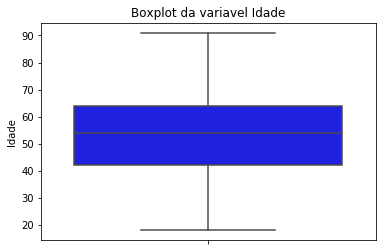

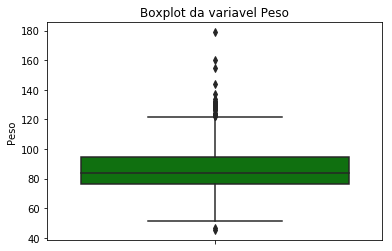

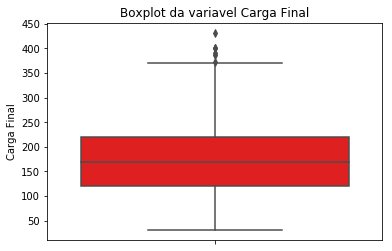

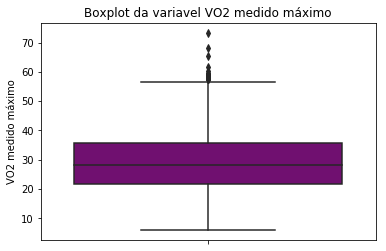

In [48]:
for i in range (0,4):
    x = dados.columns[i]
    sns.boxplot(y=x,data=dados,color=Color[i])
    plt.title('Boxplot da variavel '+x)
    plt.savefig('Boxplot da variavel '+x)
    plt.show()
    print("\n\n")
    

Idade 

Parametros da exponencial
 Lambda:  0.018764910258257682 
 Mean:  53.29095563139932 


Parametros da Normal
 Mean:  53.29095563139932 
 Standard deviation:  14.74000454202967 

Parametros da LogNormal
 Sigma:  0.30599541757899545 
 Mean:  3.932509819486875
 Scale:  51.03490546445673 
(Scale é o parametro que a função 
 stats.lognorm pede, sendo scale = e**mean) 


Parametros da Weibull
 Constante da Weibull:  4.089481828645864
 loc da Weibull:  0
 Scale da Weibull:  58.78289005707875 



/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


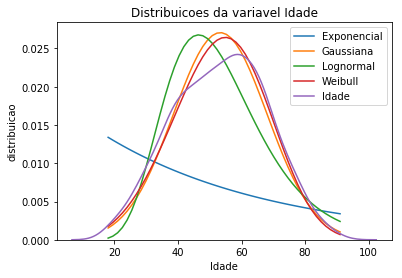




Peso 

Parametros da exponencial
 Lambda:  0.01163795127968308 
 Mean:  85.92577645051215 


Parametros da Normal
 Mean:  85.92577645051195 
 Standard deviation:  14.792798421798961 

Parametros da LogNormal
 Sigma:  0.16609333853515282 
 Mean:  4.439451920143028
 Scale:  84.72849096643188 
(Scale é o parametro que a função 
 stats.lognorm pede, sendo scale = e**mean) 


Parametros da Weibull
 Constante da Weibull:  5.408013188534343
 loc da Weibull:  0
 Scale da Weibull:  92.24080850317551 



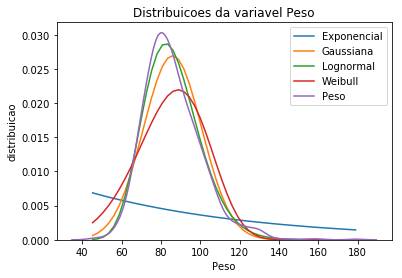




Carga Final 

Parametros da exponencial
 Lambda:  0.005804790636258545 
 Mean:  172.27150170648466 


Parametros da Normal
 Mean:  172.27150170648466 
 Standard deviation:  70.06321407132464 

Parametros da LogNormal
 Sigma:  0.45862496387078977 
 Mean:  5.0546544058509895
 Scale:  156.7503489788636 
(Scale é o parametro que a função 
 stats.lognorm pede, sendo scale = e**mean) 


Parametros da Weibull
 Constante da Weibull:  2.6469810001574725
 loc da Weibull:  0
 Scale da Weibull:  194.0388415799269 



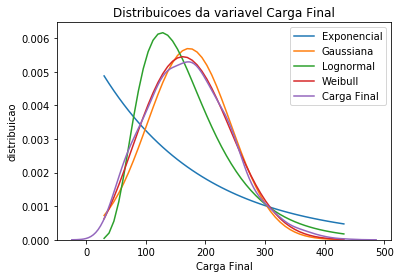




VO2 medido máximo 

Parametros da exponencial
 Lambda:  0.03401970593551014 
 Mean:  29.394727923153184 


Parametros da Normal
 Mean:  29.39472792315316 
 Standard deviation:  10.492770588808401 

Parametros da LogNormal
 Sigma:  0.3790041155569221 
 Mean:  3.3132400746591215
 Scale:  27.473999224027324 
(Scale é o parametro que a função 
 stats.lognorm pede, sendo scale = e**mean) 


Parametros da Weibull
 Constante da Weibull:  2.9978221690896216
 loc da Weibull:  0
 Scale da Weibull:  32.9274599599628 



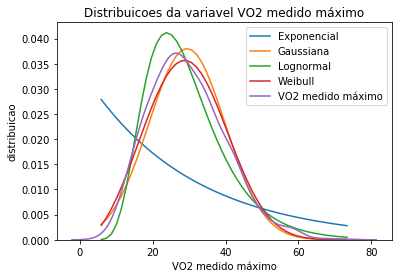

In [66]:
for i in range(0,4):
    x= dados.columns[i]
    intervalo = np.linspace(dados[x].min(),dados[x].max())
    print(x, "\n")
    
    #Exponencial
    
    #Na função expon do scipy, para gerar a pdf a função pede o parametro scale que é 1/lambda, como
    #na função exponcencial lambda é 1/média, scale é igual a media
    
    exponencial = expon.pdf(intervalo,scale=dados[x].mean())
    exponencial_lambda = 1/dados[x].mean()
    plt.plot(intervalo,exponencial, label ="Exponencial")
    print("Parametros da exponencial\n",'Lambda: ',exponencial_lambda, "\n Mean: ",dados[x].mean(),'\n\n')
    
    #Gaussiana
    
    #Na função norm da scipy, para gerar a pdf ele pede o parametro loc como a media e o parametro
    #scale como o desvio padrão(standard deviation), os dois parametros podem ser conseguidos utilizando a
    #função norm.fit(x) sendo x os valores do dataset. 
    
    gaussiana_params = norm.fit(dados[x])
    gaussiana= norm(norm.fit(dados[x])[0],norm.fit(dados[x])[1]).pdf(intervalo)
    plt.plot(intervalo, gaussiana, label="Gaussiana")
    print('Parametros da Normal\n','Mean: ',norm.fit(dados[x])[0],'\n','Standard deviation: ', norm.fit(dados[x])[1],'\n' )
    

    
    #Lognormal
    
    # Na função lognorm da scipy, para gerar a pdf a função pede os parametros: loc, scale e s. Todos foram conseguidos
    # através do lognorm.fit(x) sendo x os valores do dataset. S é sigma(standard deviation), scale é e**mu, ou seja
    # e**mean. Loc é igual a 0, pois a função é igual a 0 em x=0
    
    lognormal_params = lognorm.fit(dados[x],floc=0)
    lognormal = lognorm.pdf(intervalo,lognormal_params[0],lognormal_params[1],lognormal_params[2])
    plt.plot(intervalo, lognormal, label="Lognormal")
    print("Parametros da LogNormal\n",'Sigma: ',lognormal_params[0], "\n Mean: ",log(lognormal_params[2]))
    print(" Scale: ",lognormal_params[2], "\n(Scale é o parametro que a função \n stats.lognorm pede, sendo scale = e**mean) \n\n")      
    
    
    #Weibull
    
    # Na função weibull_min da scipy, para gerar a pdf a função pede os parametros:
    #
    #
    
    weibull_params = weibull_min.fit(dados[x],floc=0)
    weibull = weibull_min.pdf(intervalo, weibull_params[0],loc=weibull_params[1], scale=weibull_params[2])
    plt.plot(intervalo, weibull, label="Weibull")
    print("Parametros da Weibull")
    print(" Constante da Weibull: ",weibull_params[0])
    print(" loc da Weibull: ", weibull_params[1])
    print(" Scale da Weibull: ",weibull_params[2],"\n")
    
    sns.kdeplot(dados[x])
    
    plt.title('Distribuicoes da variavel '+x)
    plt.xlabel(x)
    plt.ylabel('distribuicao')
    plt.savefig('Distribuicoes da variavel '+x)
    plt.show()
    print("\n\n")
    
    
    
    
    
    
    

Idade 



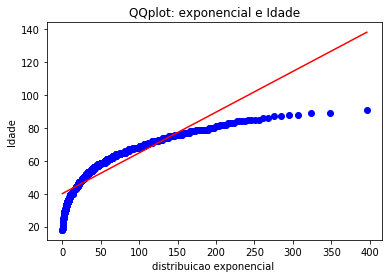

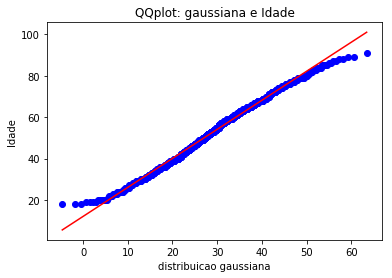

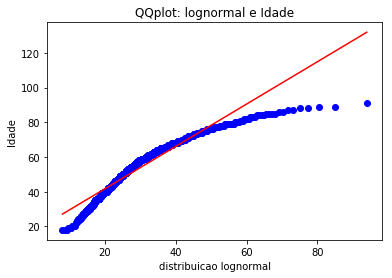

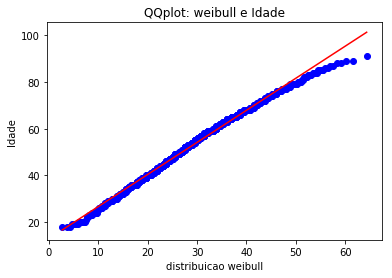




Peso 



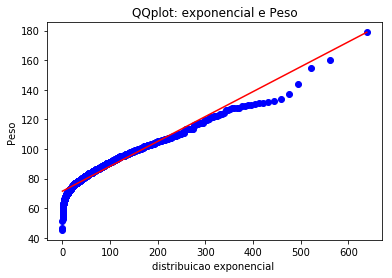

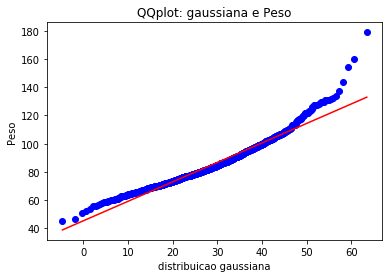

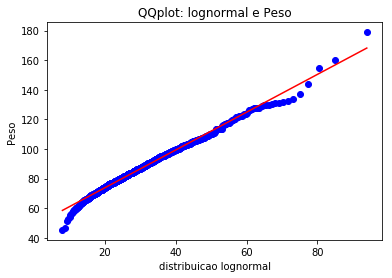

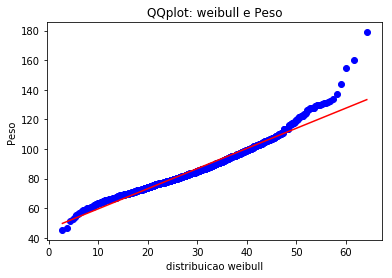




Carga Final 



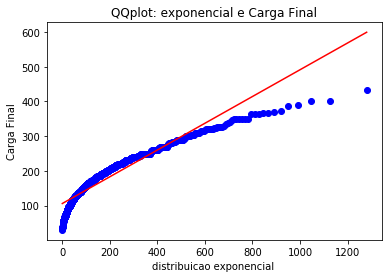

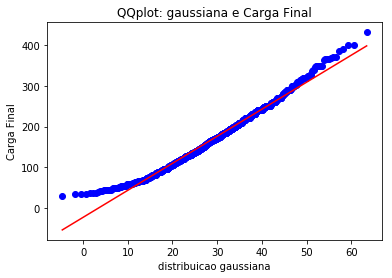

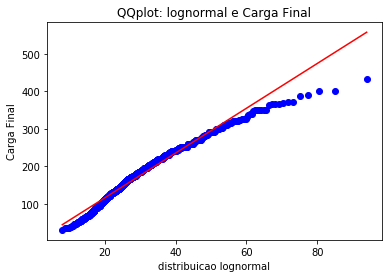

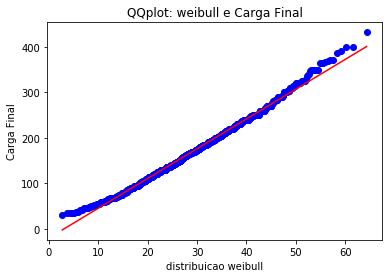




VO2 medido máximo 



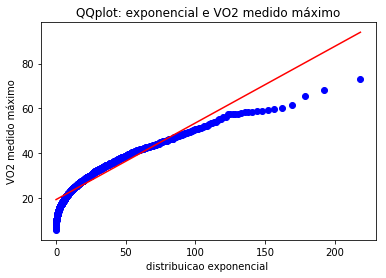

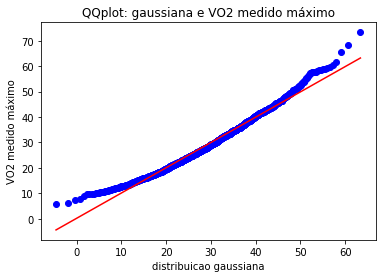

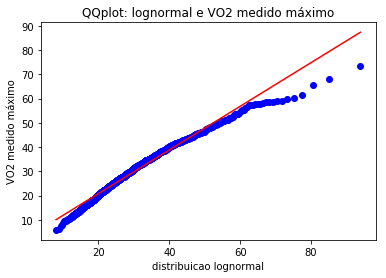

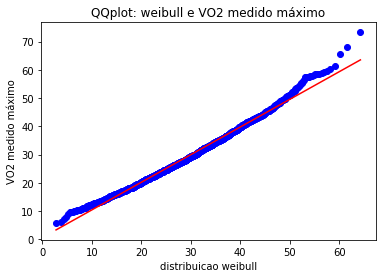

In [15]:
for i in range(0,4):
    x= dados.columns[i]
    print(x, "\n")
    
    #exponencial
    
    expon_params = expon.fit(dados[x],floc=0)
    probplot(dados[x], dist='expon',sparams=expon_params,plot=plt)
    plt.title('QQplot: exponencial e '+x)
    plt.ylabel(x)
    plt.xlabel('distribuicao exponencial ')
    plt.savefig('QQplot_exponencial_e_'+x+".png")
    plt.show()
    
    #gaussiana
    
    probplot(dados[x], dist='norm', sparams=gaussiana_params,plot=plt)
    plt.title('QQplot: gaussiana e '+x)
    plt.ylabel(x)
    plt.xlabel('distribuicao gaussiana')
    plt.savefig('QQplot_gaussiana_e_'+x+".png")
    plt.show()
    
    #lognormal
    
    probplot(dados[x], dist='lognorm',sparams=lognormal_params,plot=plt)
    plt.title('QQplot: lognormal e '+x)
    plt.ylabel(x)
    plt.xlabel('distribuicao lognormal')
    plt.savefig('QQplot_lognormal_e_'+x+ ".png")
    plt.show()
    
    #weibull
    
    probplot(dados[x], dist='weibull_min',sparams=weibull_params,plot=plt)
    plt.title('QQplot: weibull e '+x)
    plt.ylabel(x)
    plt.xlabel('distribuicao weibull')
    plt.savefig('QQplot_weibull_e_'+x+ ".png")
    plt.show()
    
    
    
    print("\n\n")

In [69]:
#Correlação entre variaveis
dados.corr()

,Idade,Peso,Carga Final,VO2 medido máximo
Idade,1.000000,-0.146315,-0.692058,-0.630072
Peso,-0.146315,1.000000,0.186422,-0.174401
Carga Final,-0.692058,0.186422,1.000000,0.878326
VO2 medido máximo,-0.630072,-0.174401,0.878326,1.000000


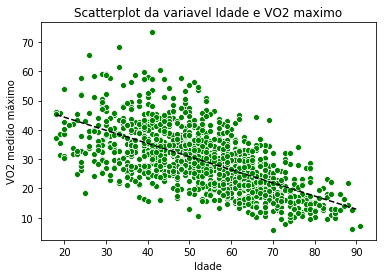

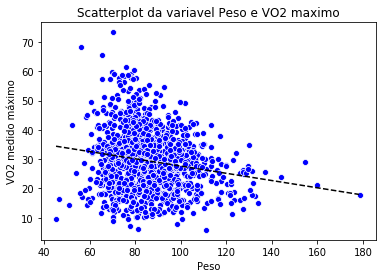

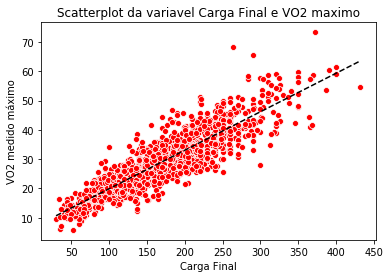

In [70]:
for i in range(0,3):
    x= dados.columns[i]
    Color_scatter =["Green", "Blue", "Red"]
    sns.scatterplot(x=dados[x], y=dados[dados.columns[3]], color=Color_scatter[i])

    a=np.arange(dados[x].min(),dados[x].max())
    regressao_linear= np.polyfit(dados[x], dados[dados.columns[3]],1)
    plt.plot(a, regressao_linear[1] + regressao_linear[0] * a, '--', color="Black")

    plt.title('Scatterplot da variavel '+x+ " e VO2 maximo")
    plt.savefig('Scatterplot da variavel '+x+ " e VO2 maximo")
    plt.show()
    print("\n\n\n")


In [19]:
x = dados.columns[3]
y = dados.columns[0]
dados[x]
np.corrcoef(dados[x],dados[y])

array([[ 1.        , -0.63007202],
       [-0.63007202,  1.        ]])

In [76]:
for i in range (0,4):
    x = dados.columns[i]
    #distribuicao_empirica =sns.kdeplot(Data[x], cumulative=True)
    print("teste de hipotese para variavel ",x,"\n")
    
    #exponencial
    expon_params = expon.fit(dados[x],floc=0)
    ks_expon = kstest(dados[x], 'expon',expon_params)
    print(" Exponencial")
    print("D = ",ks_expon[0])
    print("p_valor = ", ks_expon[1],"\n" )
    
    #gaussiana
    print(" Gaussiana")
    norm_params = norm.fit(dados[x])
    ks_gauss = kstest(dados[x], 'norm',norm_params)
    print("D = ",ks_gauss[0])
    print("p_valor = ", ks_gauss[1],"\n")
    
    #lognormal
    print(" Lognormal")
    lognorm_params = lognorm.fit(dados[x], floc=0)
    ks_lognorm = kstest(dados[x] ,'lognorm',lognorm_params)
    print("D = ",ks_lognorm[0])
    print("p_valor = ", ks_lognorm[1],"\n")
    
    #weibull
    print(" Weibull")
    weibull_params = weibull_min.fit(dados[x],floc=0)
    ks_weibull = kstest(dados[x], 'weibull_min',weibull_params)
    print("D = ",ks_weibull[0])
    print("p_valor = ", ks_weibull[1],"\n\n\n\n")

teste de hipotese para variavel  Idade 

 Exponencial
D =  0.372755615059967
p_valor =  0.0 

 Gaussiana
D =  0.04408368872194113
p_valor =  0.02039175142102323 

 Lognormal
D =  0.084730460447627
p_valor =  9.073029882955552e-08 

 Weibull
D =  0.033037815723893305
p_valor =  0.15145170476000502 




teste de hipotese para variavel  Peso 

 Exponencial
D =  0.4954410013455397
p_valor =  0.0 

 Gaussiana
D =  0.06661818817785059
p_valor =  5.7584235073626644e-05 

 Lognormal
D =  0.032285259002662436
p_valor =  0.17003957723543306 

 Weibull
D =  0.1032173331741221
p_valor =  2.5226265520927882e-11 




teste de hipotese para variavel  Carga Final 

 Exponencial
D =  0.28651634266099946
p_valor =  0.0 

 Gaussiana
D =  0.039233911356943985
p_valor =  0.052776560691338625 

 Lognormal
D =  0.08035970386976421
p_valor =  4.962162909460943e-07 

 Weibull
D =  0.02457022560625388
p_valor =  0.47886304960046483 




teste de hipotese para variavel  VO2 medido máximo 

 Exponencial
D =  0.33

In [75]:
prior=[]
low=30.00
high=70.20
hypothesis=[]
likelihood_menos_35 =[]
likelihood_mais_35 =[]

x = "Carga Final"
y = "VO2 medido máximo" 


for i in range(0,9):
    hypothesis.append((round(low,1),round(high,1)))
    count_prior=dados[(dados[x]>=low) & (dados[x]<high)]
    prior.append(count_prior[x].count()/dados[x].count())
    
    count_likelihood_menos_35 =dados[(dados[x]>=low) & (dados[x]<high) & (dados[y]<35.0)]
    likelihood_menos_35.append(count_likelihood_menos_35[y].count()/count_prior[x].count())
    
    count_likelihood_mais_35 =dados[(dados[x]>=low) & (dados[x]<high) & (dados[y]>=35.0)]
    likelihood_mais_35.append(count_likelihood_mais_35[y].count()/count_prior[x].count())
    
    low+= 40.2
    high+= 40.2

hypothesis.append((round(low,1),round(high,1)))

count_prior=dados[(dados[x]>=low) & (dados[x]<=high)]
prior.append(count_prior[x].count()/dados[x].count())

count_likelihood_menos_35 =dados[(dados[x]>=low) & (dados[x]<=high) & (dados[y]<35.0)]
likelihood_menos_35.append(count_likelihood_menos_35[y].count()/count_prior[x].count())
    
count_likelihood_mais_35 =dados[(dados[x]>=low) & (dados[x]<=high) & (dados[y]>=35.0)]
likelihood_mais_35.append(count_likelihood_mais_35[x].count()/count_prior[y].count())
    

bayes_numerator_menos_35=[]
bayes_numerator_mais_35=[]
for i in range(0,10):
    bayes_numerator_menos_35.append(prior[i]*likelihood_menos_35[i])
    bayes_numerator_mais_35.append(prior[i]*likelihood_mais_35[i])
    
total_menos_35=np.sum(bayes_numerator_menos_35)
total_mais_35=np.sum(bayes_numerator_mais_35)

posterior_menos_35=[]
posterior_mais_35 =[]

for i in range(0,10):
    posterior_menos_35.append(bayes_numerator_menos_35[i]/total_menos_35)
    posterior_mais_35.append(bayes_numerator_mais_35[i]/total_mais_35)

    
    
predict=[]
for i in range(0,10):
    predict.append(bayes_numerator_menos_35[i]*likelihood_mais_35[i])

sum_predict=np.sum(predict)

prob=[]
for i in range(0,10):
    prob.append(predict[i]/sum_predict)
    
inference_menos_35= pd.DataFrame({"hypothesis":hypothesis,
                              "prior":prior,
                              "likelihood" : likelihood_menos_35,
                              "Bayes Num":bayes_numerator_menos_35,
                              "Posterior":posterior_menos_35})

inference_mais_35= pd.DataFrame({"hypothesis":hypothesis,
                              "prior":prior,
                              "likelihood" :likelihood_mais_35,
                              "Bayes Num":bayes_numerator_mais_35,
                              "Posterior":posterior_mais_35})

inference_cond= pd.DataFrame({"hypothesis":hypothesis,
                              "prior":prior,
                              "likelihood-1(<35)" :likelihood_menos_35,
                              "Bayes Num 1":bayes_numerator_menos_35,
                              "likelihood-2(>=35)" : likelihood_mais_35,
                              "Bayes Num 2": predict,
                              "Posterior": prob })

print("hipotese que VO2 máximo esta abaixo da média 35\n\n",inference_menos_35 ,"\n")
print(total_menos_35,"\n\n\n\n")
print("hipotese que VO2 máximo esta acima da média 35\n\n",inference_mais_35,"\n")
print(total_mais_35,"\n\n\n\n")
print("hipotese que VO2 máximo esta acima da média 35, dado que antes estava abaixo da media \n\n",inference_cond,"\n")
print("total bayes numerator 1",total_menos_35)
print("sum posterior(teste): ", np.sum(prob))
print("sum bayes numerator 2: ", sum_predict,"\n\n\n\n")


hipotese que VO2 máximo esta abaixo da média 35

        hypothesis     prior  likelihood  Bayes Num  Posterior
0    (30.0, 70.2)  0.071672    1.000000   0.071672   0.099291
1   (70.2, 110.4)  0.132253    1.000000   0.132253   0.183215
2  (110.4, 150.6)  0.208191    0.987705   0.205631   0.284870
3  (150.6, 190.8)  0.209044    0.848980   0.177474   0.245863
4  (190.8, 231.0)  0.182594    0.588785   0.107509   0.148936
5  (231.0, 271.2)  0.119454    0.200000   0.023891   0.033097
6  (271.2, 311.4)  0.041809    0.061224   0.002560   0.003546
7  (311.4, 351.6)  0.024744    0.034483   0.000853   0.001182
8  (351.6, 391.8)  0.007679    0.000000   0.000000   0.000000
9  (391.8, 432.0)  0.001706    0.000000   0.000000   0.000000 

0.7218430034129693 




hipotese que VO2 máximo esta acima da média 35

        hypothesis     prior  likelihood  Bayes Num  Posterior
0    (30.0, 70.2)  0.071672    0.000000   0.000000   0.000000
1   (70.2, 110.4)  0.132253    0.000000   0.000000   0.000000
2  (110